In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
from collections import Counter
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 15),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [3]:
#get data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, header=None, names=col_names)
pima.head(3)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
def mad_outlier(data, thresh=3.5):
    med=np.median(data)
    diff = ((data-med)**2)**0.5
    med_abs_dev = np.median(diff)
    mod_z = 0.6725* diff/med_abs_dev
    return mod_z > thresh

def pctile_outlier(data,threshold = 95.0):
    rng = (100-threshold)/2
    minval, maxval = np.percentile(data,[rng,100-rng])
    return (data < minval) | (data > maxval)

def std_outlier(data, thresh = 3):
    mu = data.mean()
    std = data.std()
    minval = mu - std*3
    maxval = mu + std*3
    return (data < minval) | (data > maxval)

In [16]:
def maj_vote_outlier(data):
    t1=mad_outlier(data)
    t2=pctile_outlier(data)
    t3=std_outlier(data)
    t_all=list(zip(t1,t2,t3))
    final = []
    for i in range(len(t_all)):
        final.append(t_all[i].count(True)>=2)
    final=pd.Series(final)
    return final

def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4)
    for ax, func in list(zip(axes, [mad_outlier, pctile_outlier, std_outlier, maj_vote_outlier])):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)
    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)
    axes[0].set_title('MAD Outlier', **kwargs)
    axes[1].set_title('Pct Outlier', **kwargs)
    axes[2].set_title('STD-based Outliers', **kwargs)
    axes[3].set_title('Majority vote based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig = plt.gcf()

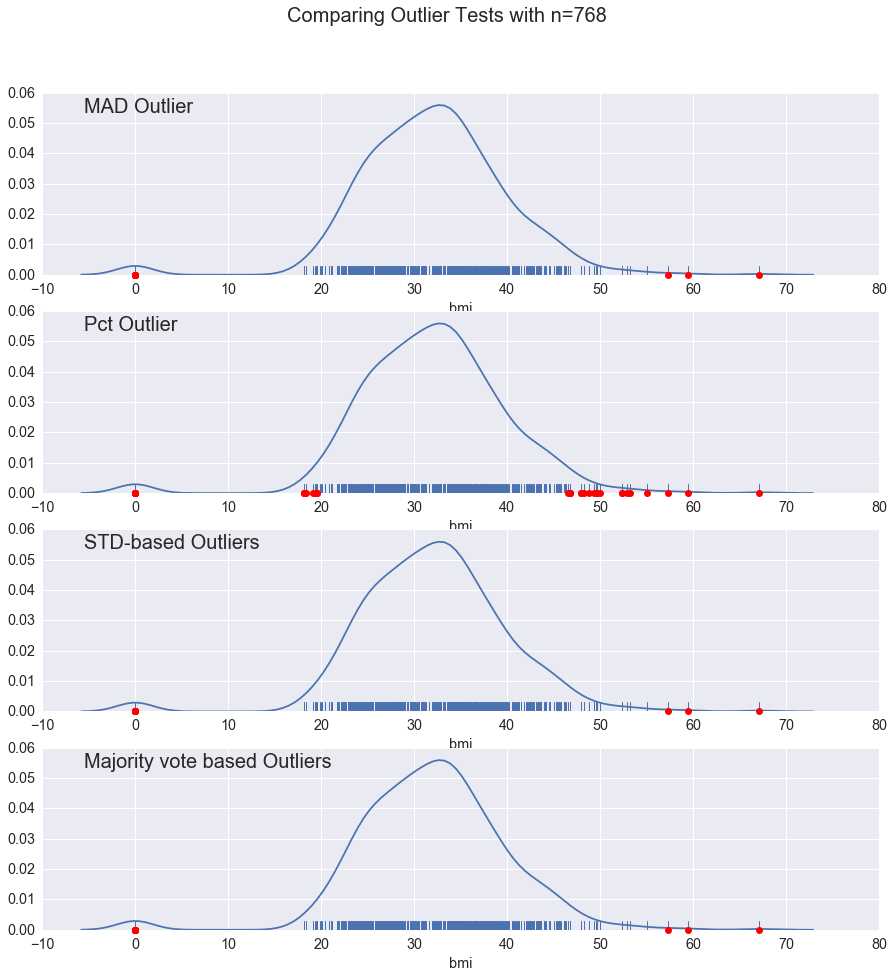

In [17]:
plotOutlier(pima.bmi)

In [ ]:
pl

In [146]:
table_alphas = pd.read_csv("C:/Users/ywu/Google Drive/Working Folder/notebooks/samples/AU_Alphas_Factor14_2006_2016.csv", delimiter=',', header=None)
table_alphas.columns = ['qaid','asof_dt','alpha','dv']
table_alphas['asof_dt']=pd.to_datetime(table_alphas['asof_dt'].astype(str).str[:10], format='%Y-%m-%d')
#table_alphas['asof_dt']=pd.to_datetime(table_alphas['asof_dt'].astype(str), format='%Y-%m-%d')
df=table_alphas
#df.set_index(['qaid','asof_dt'],verify_integrity=True,drop=True,inplace=True)
df=df[['qaid','asof_dt','alpha']]
df=df.pivot(index='asof_dt',columns='qaid',values='alpha')
df1=df.shift(-1)

In [ ]:
df.